In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [6]:
df = pd.read_csv("amazon_sales_data 2025.csv")
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [11]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [10]:
df['Total Sales'].describe()


count     250.000000
mean      975.380000
std      1252.112254
min        15.000000
25%       100.000000
50%       400.000000
75%      1500.000000
max      6000.000000
Name: Total Sales, dtype: float64

In [13]:
df.tail()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled
249,ORD0250,19-02-25,Smartphone,Electronics,500,4,2000,Emily Johnson,Seattle,Amazon Pay,Completed


In [17]:
df.corr(numeric_only=True)

,Price,Quantity,Total Sales
Price,1.000000,-0.010858,0.846673
Quantity,-0.010858,1.000000,0.332444
Total Sales,0.846673,0.332444,1.000000


<Axes: >

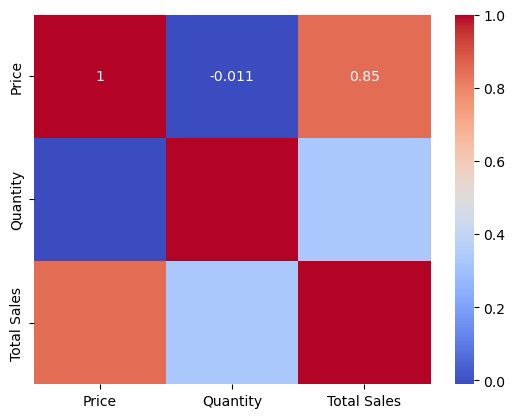

In [25]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True,cmap="coolwarm")

/home/aman-chaurasia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aman-chaurasia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


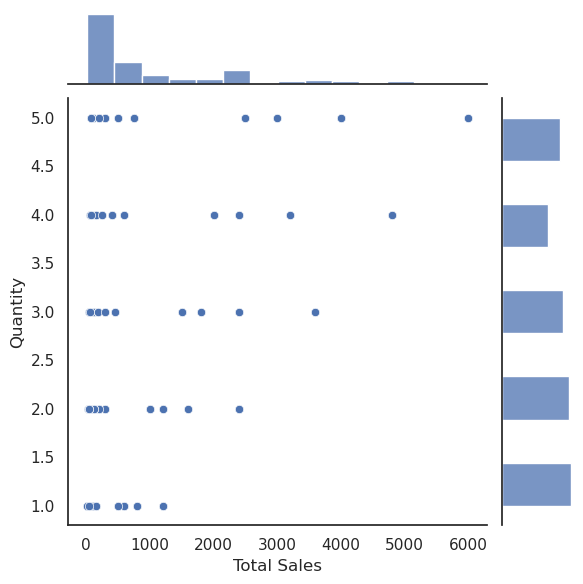

In [27]:
df_Time_web_Amount=df.filter({"Total Sales","Quantity"})
sns.set(style="white", color_codes=True)
sns.color_palette()
sns.jointplot(x="Total Sales",y="Quantity", data=df_Time_web_Amount)

<Axes: >

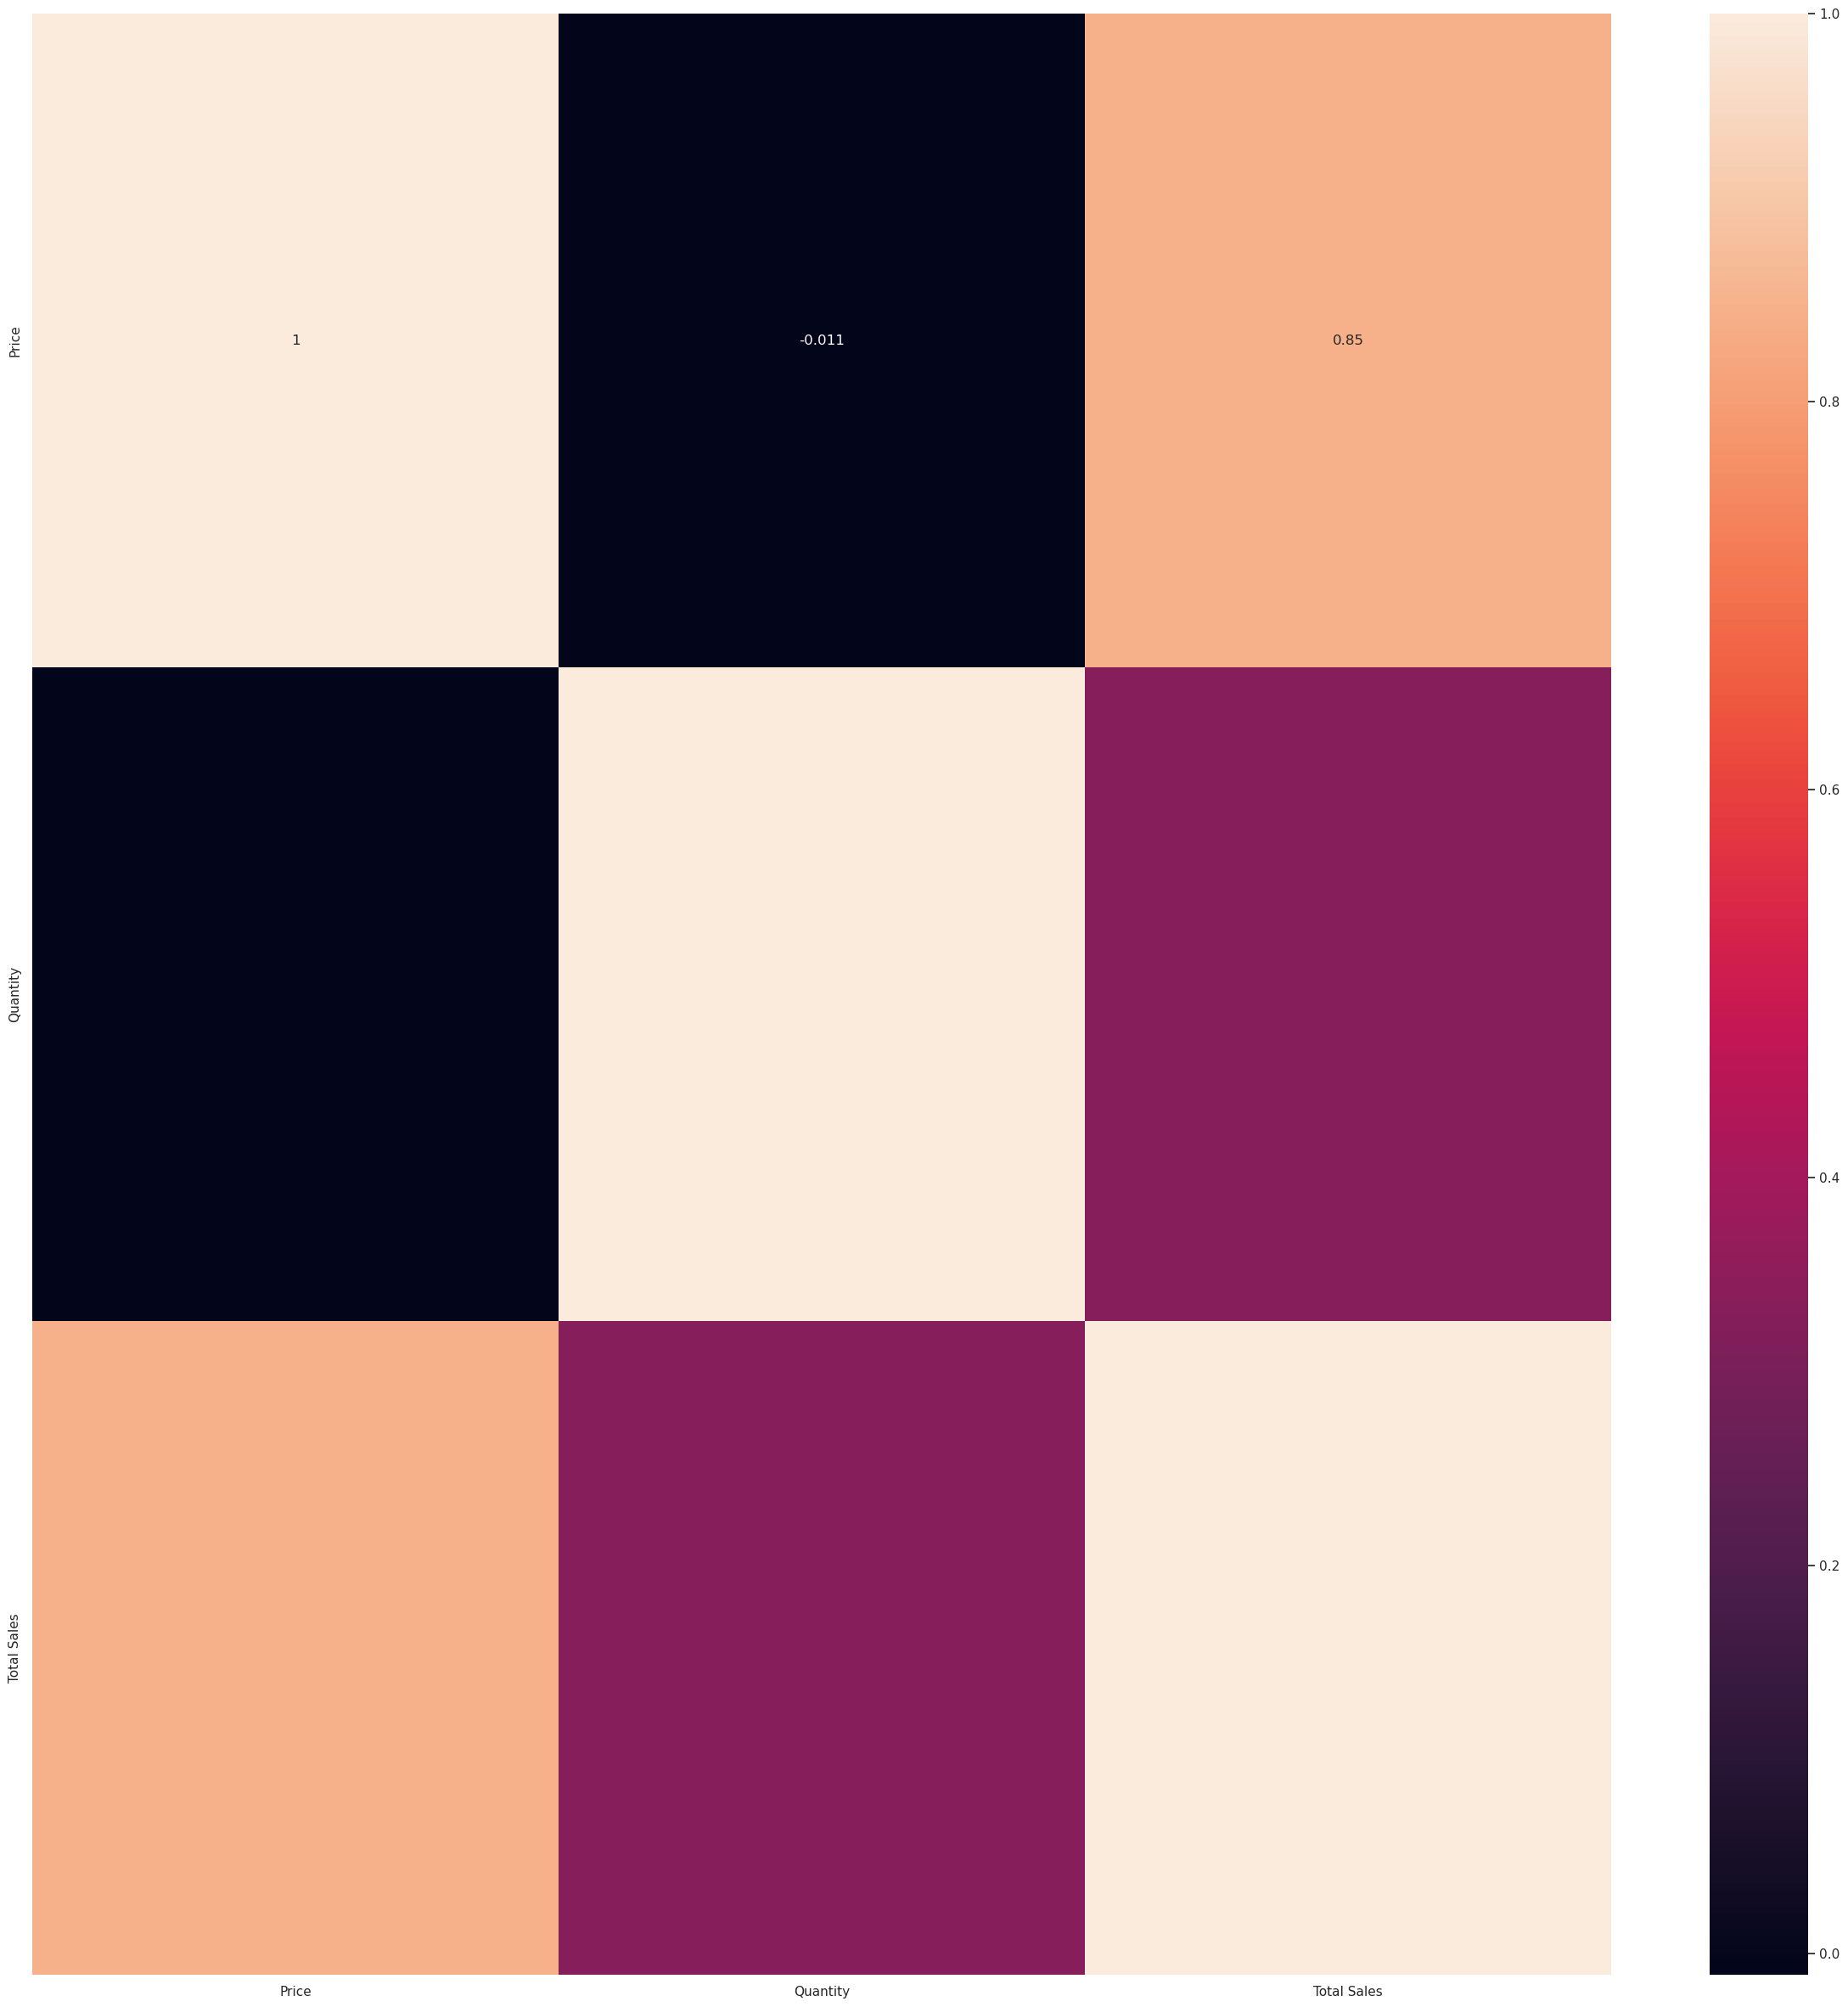

In [33]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(numeric_only="TRUE"),annot= True)

In [35]:
target = "Total Sales"

In [39]:
X = df.drop(columns=["Total Sales"]).dropna(axis=1)
y = df["Total Sales"]

In [41]:
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = LabelEncoder().fit_transform(X[col])


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train

,Order ID,Date,Product,Category,Price,Quantity,Customer Name,Customer Location,Payment Method,Status
132,132,45,3,2,800,1,3,7,0,2
225,225,10,5,3,60,4,0,1,0,1
238,238,44,7,2,150,5,1,4,0,1
119,119,31,3,2,800,5,3,3,4,1
136,136,40,7,2,150,3,9,8,2,1
...,...,...,...,...,...,...,...,...,...,...
106,106,38,2,1,40,3,8,2,1,0
14,14,39,7,2,150,4,6,9,1,1
92,92,12,4,4,1200,5,2,3,4,0
179,179,8,4,4,1200,3,2,0,3,1


In [47]:
y_train

132     800
225     240
238     750
119    4000
136     450
       ... 
106     120
14      600
92     6000
179    3600
102      40
Name: Total Sales, Length: 200, dtype: int64

In [49]:
X_test

,Order ID,Date,Product,Category,Price,Quantity,Customer Name,Customer Location,Payment Method,Status
142,142,59,4,4,1200,2,5,2,4,0
6,6,36,7,2,150,4,4,4,4,1
97,97,27,7,2,150,2,0,6,4,2
60,60,22,4,4,1200,1,5,7,4,0
112,112,38,0,0,15,5,2,8,2,2
181,181,4,8,1,20,5,4,3,4,1
197,197,39,3,2,800,4,5,9,0,2
184,184,44,8,1,20,1,0,2,2,1
9,9,24,6,2,500,1,3,8,1,0
104,104,32,2,1,40,1,5,0,2,2


In [51]:
y_test

142    2400
6       600
97      300
60     1200
112      75
181     100
197    3200
184      20
9       500
104      40
200      60
216     120
236     300
240    2000
67      100
224      40
194    1500
15     1200
177    1500
24       75
247      40
19      400
114     180
68     4800
176      75
45      120
55      300
10       30
30      500
120     500
201    1000
33      100
141    1500
219     450
25      600
111    1200
18      180
196     120
180     120
159    1800
118    1000
96       75
108     200
185    2400
222      80
16       20
146     300
69       15
173     300
38     1600
Name: Total Sales, dtype: int64

In [53]:
l_model = LinearRegression()
l_model.fit(X_train,y_train)

LinearRegression()

In [55]:
d_model = DecisionTreeRegressor()
d_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [57]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [61]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
rmse

13240.319150000001


115.06658572322375